# Introducción


La operadora de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad. Para este proyecto se va a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Se tendrán los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. El objetivo del proyecto es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos. Mediante un análisis estadístico se describirá el comportamiento de los clientes y se probarán las siguientes hipótesis:

- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.

# Inicialización

In [ ]:
# Cargar todas las librerías
from scipy import stats as st
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

# Cargar los datos

In [ ]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

# Preparar los datos

Para prepar los datos se revisarán las tablas de los dataframes para revisar como se compone cada una y verificar los errores que se encuentren como valores ausentes, tipos de datos, valores incorrectos, etc.

## Planes

In [ ]:
# Imprime la información general/resumen sobre el DataFrame de los planes
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
# Imprime una muestra de los datos para los planes
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


La tabla de "Planes" se compone de 2 filas con 8 columnas, las cuales no tienen mayor problema y no hay datos por corregir.

## Usuarios

In [ ]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
# Imprime una muestra de los datos para los usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


La tabla users tiene 500 filas y 8 columnas. La columna churn_date tiene datos ausentes, pero esto es debido a que cuando fueron tomados estos datos, los usuarios permanecian activos con el plan, por tal motivo a los datos ausentes de esta columna los cambiaremos por la palabra "active".

### Corregir datos

In [ ]:
users['churn_date'] = users['churn_date'].fillna('active')

In [ ]:
users['churn_date'].isna().sum()

0

### Enriquecer datos

In [ ]:
users=users.rename(columns={'plan': 'plan_name'})

## Llamadas

In [ ]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
calls.info()
print()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
# Imprime una muestra de datos para llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


La tabla de calls tiene 137735 filas y 4 columnas. Las cuales detallan los movimientos de cada usuario. Se encuentran llamadas con una duración de 0 minutos, las cuales representan a llamadas perdidas o no contestadas. No se encuentran valores ausentes. Se va a revisar la cantidad de filas con valor de 0 para tomar una decisión acerca de que si se eliminan los valores o no.

### Corregir datos

In [ ]:
calls.query('duration == 0').count()

id           26834
user_id      26834
call_date    26834
duration     26834
dtype: int64

In [ ]:
calls['duration'] = np.ceil(calls['duration'])

El porcentaje de llamadas con valor "0" es del 19%, es un valor representativo, por tal motivo no se pueden eliminar esos valores, esas llamadas se las va a mantender en el valor de "0", ya que después al sumar los valores totales por usuario no me afectará al resultado. Se agregará una columna que me indique el mes de cada call_date y se redondeó hacia arriba los valores de la duración de las llamadas.

Hola Carlos, gracias por el comentario, ya realicé esta modificación

### Enriquecer datos

In [ ]:
calls['month']=pd.DatetimeIndex(calls['call_date']).month

In [ ]:
calls = calls.assign(call_co=1)
calls.head()

,id,user_id,call_date,duration,month,call_co
0,1000_93,1000,2018-12-27,9.0,12,1
1,1000_145,1000,2018-12-27,14.0,12,1
2,1000_247,1000,2018-12-27,15.0,12,1
3,1000_309,1000,2018-12-28,6.0,12,1
4,1000_380,1000,2018-12-30,5.0,12,1


## Mensajes

In [ ]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
messages.info()
print()
messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
# Imprime una muestra de datos para los mensajes
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


La tabla messages tiene 76051 filas y 3 columnas. No tiene valores ausentes, ni valores que se deban cambiar. Solo se agregará una columna de cada mes de message_date.

### Enriquecer datos

In [ ]:
messages['month']=pd.DatetimeIndex(messages['message_date']).month
messages = messages.assign(message_count=1)
messages.head()

,id,user_id,message_date,month,message_count
0,1000_125,1000,2018-12-27,12,1
1,1000_160,1000,2018-12-31,12,1
2,1000_223,1000,2018-12-31,12,1
3,1000_251,1000,2018-12-27,12,1
4,1000_255,1000,2018-12-26,12,1


## Internet

In [ ]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
internet.info()
print()
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [ ]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La tabla internet tiene 104825 filas y 4 columnas. No tiene valores ausentes, ni valores que se deban cambiar. Se agregará una columna de cada mes de session_date. La columna mb_used tiene valores igual a 0, se calculará el porcentaje para saber si se pueden eliminar estos valores o no.

### Corregir datos

In [ ]:
internet.query('mb_used == 0').count()

id              13747
user_id         13747
session_date    13747
mb_used         13747
dtype: int64

El porcentaje de llamadas con valor "0" es del 13%, es un valor representativo, por tal motivo no se eliminarán esos valores.

### Enriquecer datos

In [ ]:
internet['month']=pd.DatetimeIndex(internet['session_date']).month

## Estudiar las condiciones del plan

### Imprime las condiciones del plan y asegúrate de que te resulten claros
Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

Surf

Pago mensual: 20$
500 minutos al mes, 50 SMS y 15 GB de datos

Si se exceden los límites del paquete:
1 minuto: 3 centavos
1 SMS: 3 centavos
1 GB de datos: 10$

Ultimate

Pago mensual: 70$
3000 minutos al mes, 1000 SMS y 30 GB de datos

Si se exceden los límites del paquete:
1 minuto: 1 centavo
1 SMS: 1 centavo
1 GB de datos: 7$

## Agregar datos por usuario


In [ ]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.

total_calls = calls.pivot_table(
    index = ['user_id', 'month'], values='call_co', aggfunc='count'
)
total_calls = total_calls.rename(columns={'call_co': "call_count"})
total_calls

call_count
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64
...                   ...
1498    12             39
1499    9              41
        10             53
        11             45
        12             65

[2258 rows x 1 columns]

In [ ]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.

total_minutes = calls.pivot_table(
    index = ['user_id', 'month'], values='duration', aggfunc='sum'
)
total_minutes = total_minutes.rename(columns={'duration': "total_minutes"})
total_minutes

total_minutes
user_id month               
1000    12             124.0
1001    8              182.0
        9              315.0
        10             393.0
        11             426.0
...                      ...
1498    12             339.0
1499    9              346.0
        10             385.0
        11             308.0
        12             496.0

[2258 rows x 1 columns]

In [ ]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
total_messages = messages.pivot_table(
    index = ['user_id', 'month'], values='message_count', aggfunc='count'
)
total_messages = total_messages.rename(columns={'message_count': "total_messages"})
total_messages

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [ ]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
total_internet = internet.pivot_table(
    index = ['user_id', 'month'], values='mb_used', aggfunc='sum'
)
total_internet = total_internet.rename(columns={'mb_used': "total_internet"})
total_internet


total_internet
user_id month                
1000    12            1901.47
1001    8             6919.15
        9            13314.82
        10           22330.49
        11           18504.30
...                       ...
1498    12           23137.69
1499    9            12984.76
        10           19492.43
        11           16813.83
        12           22059.21

[2277 rows x 1 columns]

In [ ]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes

data = pd.merge(total_calls, total_minutes, on=['user_id', 'month'], how='outer')
data = pd.merge(data, total_messages, on=['user_id', 'month'], how='outer')
data = pd.merge(data, total_internet, on=['user_id', 'month'], how='outer')
data = data.fillna(0)
data = data.reset_index()
data


,user_id,month,call_count,total_minutes,total_messages,total_internet
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91
2289,1361,5,0.0,0.0,2.0,1519.69
2290,1482,10,0.0,0.0,2.0,0.00
2291,1108,12,0.0,0.0,0.0,233.17


Hola Carlos, gracias por el comentario, ya realicé esta modificación

In [ ]:
# Añade la información del plan

data = pd.merge(users[['user_id', 'plan_name']], data, on='user_id', how='outer')
data

,user_id,plan_name,month,call_count,total_minutes,total_messages,total_internet
0,1000,ultimate,12.0,16.0,124.0,11.0,1901.47
1,1001,surf,8.0,27.0,182.0,30.0,6919.15
2,1001,surf,9.0,49.0,315.0,44.0,13314.82
3,1001,surf,10.0,65.0,393.0,53.0,22330.49
4,1001,surf,11.0,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...,...
2298,1498,surf,12.0,39.0,339.0,0.0,23137.69
2299,1499,surf,9.0,41.0,346.0,0.0,12984.76
2300,1499,surf,10.0,53.0,385.0,0.0,19492.43
2301,1499,surf,11.0,45.0,308.0,0.0,16813.83


In [ ]:
data = data.fillna(0)
data['call_count'] = data['call_count'].astype('int')
data['total_messages'] = data['total_messages'].astype('int')
data['total_minutes'] = data['total_minutes'].astype('int')

Hola Carlos, gracias por el comentario, si, ya realicé esta modificación anteriormente.

La columna total_internet se dividió para 1024 y se redondeó hacia arriba porque la operadora decidió realizar esta acción para calcular las mb consumidas.

In [ ]:
data['total_internet'] = np.ceil(data['total_internet']/1024)

Gracias por el comentario, ya realicé esta modificación.

En la siguiente tabla se encuentra los mensajes, mb y minutos que se incluye en cada plan para cada usuario.

In [ ]:
users

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,active
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,active


In [ ]:
data = pd.merge(plans[['plan_name','messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute']], data, on='plan_name')
data = data.sort_values(by='user_id')
data = data.reset_index(drop=True)
data
#2303

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,call_count,total_minutes,total_messages,total_internet
0,ultimate,1000,30720,3000,70,7,0.01,0.01,1000,12.0,16,124,11,2.0
1,surf,50,15360,500,20,10,0.03,0.03,1001,8.0,27,182,30,7.0
2,surf,50,15360,500,20,10,0.03,0.03,1001,9.0,49,315,44,14.0
3,surf,50,15360,500,20,10,0.03,0.03,1001,10.0,65,393,53,22.0
4,surf,50,15360,500,20,10,0.03,0.03,1001,11.0,64,426,36,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,surf,50,15360,500,20,10,0.03,0.03,1498,12.0,39,339,0,23.0
2299,surf,50,15360,500,20,10,0.03,0.03,1499,9.0,41,346,0,13.0
2300,surf,50,15360,500,20,10,0.03,0.03,1499,10.0,53,385,0,20.0
2301,surf,50,15360,500,20,10,0.03,0.03,1499,12.0,65,496,0,22.0


In [ ]:
data['mb_per_month_included'] = data['mb_per_month_included']/1024

In [ ]:
# Calcula el ingreso mensual para cada usuario
def extra_message(row):
    messages_included = row['messages_included']
    total_messages = row['total_messages']
    usd_per_message = row['usd_per_message']

    if total_messages > messages_included:
        return (total_messages - messages_included)*usd_per_message
    return 0

def extra_mb(row):
    mb_per_month_included = row['mb_per_month_included']
    total_internet = row['total_internet']
    usd_per_gb = row['usd_per_gb']

    if total_internet > mb_per_month_included:
        return (total_internet - mb_per_month_included)*usd_per_gb
    return 0

def extra_call(row):
    minutes_included = row['minutes_included']
    total_minutes = row['total_minutes']
    usd_per_minute = row['usd_per_minute']

    if total_minutes > minutes_included:
        return (total_minutes - minutes_included)*usd_per_minute
    return 0

In [ ]:
data['extra_message'] = data.apply(extra_message, axis=1)
data['extra_mb'] = data.apply(extra_mb, axis=1)
data['extra_call'] = data.apply(extra_call, axis=1)

Se agrega una columna llamada "total_incoming", la cual muestra el ingreso total por parte de los valores extra y el valor del plan. También se agrega la columna city para cada usuario.

In [ ]:
data = data.assign(total_incoming = data['extra_message'] + data['extra_mb'] + data['extra_call'] + data['usd_monthly_pay'])
data = pd.merge(data, users, on=['user_id'], how='outer')
data = data.rename(columns={'plan_name_x': "plan_name"})
data

,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,user_id,month,...,extra_mb,extra_call,total_incoming,first_name,last_name,age,city,reg_date,plan_name_y,churn_date
0,ultimate,1000,30.0,3000,70,7,0.01,0.01,1000,12.0,...,0.0,0.0,70.00,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,active
1,surf,50,15.0,500,20,10,0.03,0.03,1001,8.0,...,0.0,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
2,surf,50,15.0,500,20,10,0.03,0.03,1001,9.0,...,0.0,0.0,20.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
3,surf,50,15.0,500,20,10,0.03,0.03,1001,10.0,...,70.0,0.0,90.09,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
4,surf,50,15.0,500,20,10,0.03,0.03,1001,11.0,...,40.0,0.0,60.00,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,surf,50,15.0,500,20,10,0.03,0.03,1498,12.0,...,80.0,0.0,100.00,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,active
2299,surf,50,15.0,500,20,10,0.03,0.03,1499,9.0,...,0.0,0.0,20.00,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active
2300,surf,50,15.0,500,20,10,0.03,0.03,1499,10.0,...,50.0,0.0,70.00,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active
2301,surf,50,15.0,500,20,10,0.03,0.03,1499,12.0,...,70.0,0.0,90.00,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,active


## Estudia el comportamiento del usuario

### Llamadas

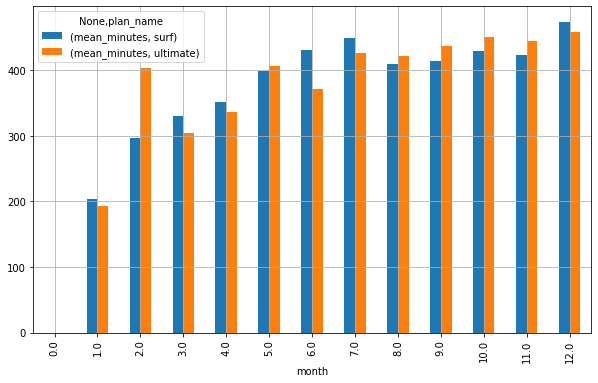

In [ ]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
data_call = data.pivot_table(index=['month'],columns = 'plan_name', values = ['total_minutes'], aggfunc='mean')
data_call = data_call.rename(columns={'total_minutes': 'mean_minutes'})
data_call.plot(kind='bar', figsize=(10,6), grid = True)
plt.show()

Se observa en el gráfico que el plan Surf tiene una ligera mayor cantidad de minutos utilizados para llamadas a diferencia del plan Ultimate. En el plan Surf se utilizaron mas minutos en el mes de Diciembre, seguido por Julio; en el plan Ultimate, se utilizaron casi en igual medida mas minutos para el mes de Octubre y Diciembre, seguido por Noviembre.

In [ ]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.

data_call_min = data.pivot_table(index=['plan_name','user_id', 'month'], values = ['total_minutes'], aggfunc='sum')
data_call_min = data_call_min.rename(columns={'total_minutes': 'sum_minutes'})
data_call_min

sum_minutes
plan_name user_id month             
surf      1001    8.0            182
                  9.0            315
                  10.0           393
                  11.0           426
                  12.0           412
...                              ...
ultimate  1493    9.0            529
                  10.0           450
                  11.0           500
                  12.0           473
          1497    12.0           300

[2303 rows x 1 columns]

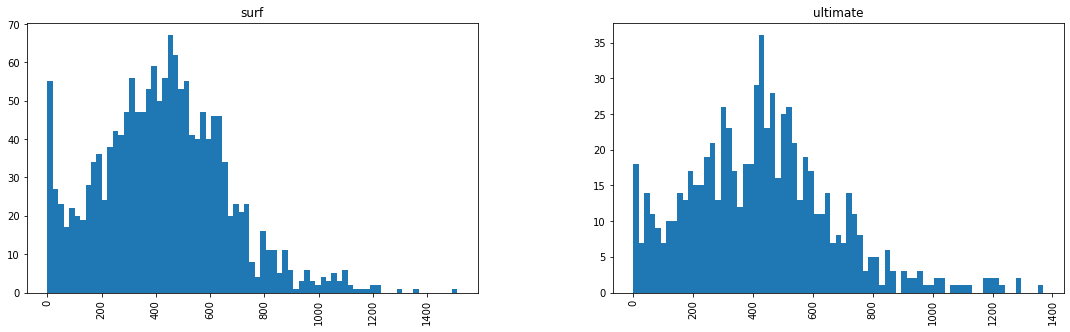

In [ ]:
data_call_min.hist(by='plan_name',bins=75, figsize=(18,5))
plt.show()

El histograma realizado para el plan "surf" y "ultimate" me señala que ambos tienen una tendencia de crecimiento, en la que, ha medida que avanzan los meses, el consumo de minutos también aumenta, pero el plan en el que las personas consumen mas minutos es el "surf", eso quiere decir que posiblemente las personas estan pagando valores extras por el consumo de minutos adicionales, por lo tanto puede ser que les convenga pasarse al plan "ultimate" que viene con mas minutos.

In [ ]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_group = data.groupby(['plan_name', 'month'])['total_minutes'].agg(['mean', 'var', 'std'])
call_group

mean           var         std
plan_name month                                      
surf      0.0      0.000000      0.000000    0.000000
          1.0    203.000000  15842.000000  125.865007
          2.0    297.000000  52226.500000  228.531179
          3.0    330.000000  35809.363636  189.233622
          4.0    351.540000  50866.743265  225.536567
          5.0    399.584416  59754.219754  244.446763
          6.0    431.298969  45592.628436  213.524304
          7.0    449.983471  61005.099725  246.992105
          8.0    410.111111  54344.645963  233.119381
          9.0    414.226804  46595.958656  215.860971
          10.0   429.729958  52278.664056  228.645280
          11.0   423.325088  51607.021602  227.171789
          12.0   473.836478  63629.518918  252.248923
ultimate  0.0      0.000000      0.000000    0.000000
          1.0    193.500000  16572.333333  128.733575
          2.0    403.142857  76889.476190  277.289517
          3.0    304.250000  61984.931818  248.967732
          4.0    336.857143  34888.928571  186.785783
          5.0    406.241379  43841.046798  209.382537
          6.0    370.957447  42503.563367  206.163924
          7.0    427.067797  72563.374635  269.375898
          8.0    421.436620  53645.506640  231.614997
          9.0    437.511628  57070.464569  238.894254
          10.0   450.735849  54261.910512  232.941861
          11.0   445.196850  60593.222847  246.156907
          12.0   459.099338  62503.783400  250.007567

La varianza y la desviación estándar tiene valores bastantes altos, esto se debe a la alta variabilidad en la que los usuarios consumen los minutos.

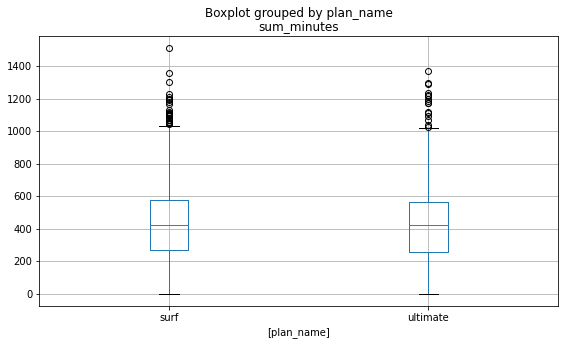

In [ ]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
data_call_min.boxplot(by='plan_name', figsize=(9,5))
plt.show()

Según el diagrama de cajas, no existe una gran diferencia entre las llamadas realizadas por el plan Surf y Ultimate, la media de llamadas para ambos se encuentra alrededor de 400. En el plan Surf se observa que existen datos atípicos mas altos que en Ultimate y uno de los bigotes tiende a alejarse un poco mas en la parte superior.

### Mensajes

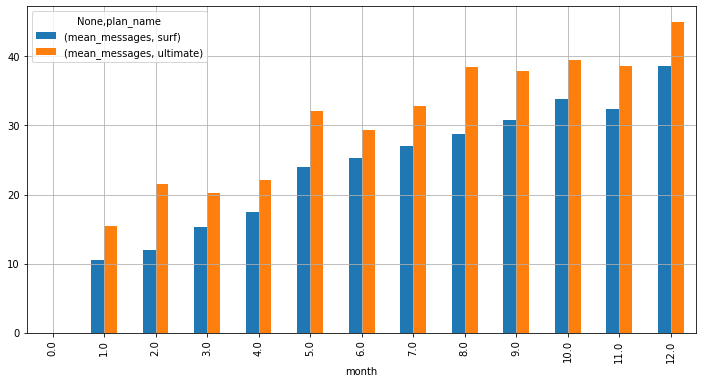

In [ ]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#data_mess = data.pivot_table(index=['plan_name', 'user_id', 'month'], values = ['total_messages'], aggfunc='mean')
data_mess = data.pivot_table(index=['month'], columns='plan_name', values = ['total_messages'], aggfunc='mean')
data_mess = data_mess.rename(columns={'total_messages': 'mean_messages'})
data_mess.plot(kind='bar', figsize=(12,6), grid = True)
plt.show()

En el siguiente gráfico se observa claramente como los usuarios del plan ultimate consumen una mayor cantidad de mensajes y por lo tanto no tienen que pagar valores extra, a diferencia de los usuarios del plan surf.

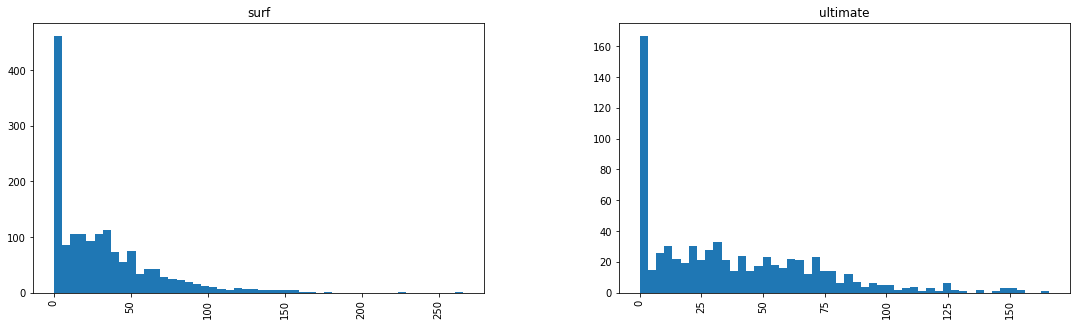

In [ ]:
data_mess1 = data.pivot_table(index=['plan_name', 'month', 'user_id'], values = ['total_messages'], aggfunc='mean')
data_mess1.hist(by='plan_name',bins=50, figsize=(18,5))
plt.show()

En el histograma de mensajes se observa que hay una gran cantidad de usuarios que no ocupa los mensajes, siendo en el plan Surf done hay mas personas que no los ocupa, adicional, hay bastantes datos atípicos en el plan surf, donde hay algunas personas que se exceden en la cantidad de mensajes que puede enviar según su plan. Mientras que en el plan Ultimate los usuarios envian bastantes mensajes, y se encuentran dentro de la cantidad de mensajes que les permite su plan.

In [ ]:
mess_group = data.groupby(['plan_name', 'month'])['total_messages'].agg(['mean', 'var', 'std'])
mess_group

mean          var        std
plan_name month                                   
surf      0.0     0.000000     0.000000   0.000000
          1.0    10.500000   220.500000  14.849242
          2.0    12.000000   386.000000  19.646883
          3.0    15.260870   346.565217  18.616262
          4.0    17.400000   501.591837  22.396246
          5.0    24.012987   847.197198  29.106652
          6.0    25.298969   914.920103  30.247646
          7.0    27.033058   923.915565  30.395979
          8.0    28.777778  1029.515528  32.086064
          9.0    30.762887  1003.829496  31.683268
          10.0   33.839662  1275.465708  35.713663
          11.0   32.385159  1065.344034  32.639608
          12.0   38.600629  1458.158612  38.185843
ultimate  0.0     0.000000     0.000000   0.000000
          1.0    15.500000   313.666667  17.710637
          2.0    21.571429   478.285714  21.869744
          3.0    20.250000   654.386364  25.580977
          4.0    22.047619   544.147619  23.326972
          5.0    32.103448  1297.310345  36.018195
          6.0    29.340426   857.620722  29.285162
          7.0    32.830508   960.488019  30.991741
          8.0    38.478873  1196.367404  34.588544
          9.0    37.895349  1050.918331  32.417871
          10.0   39.443396  1221.106289  34.944331
          11.0   38.606299  1232.669166  35.109389
          12.0   45.006623  1549.419956  39.362672

La media de los valores de los mensajes aumenta de igual forma que en las llamadas, existe una alta varianza y desviación estándar debido a la alta variabilidad entre los datos.

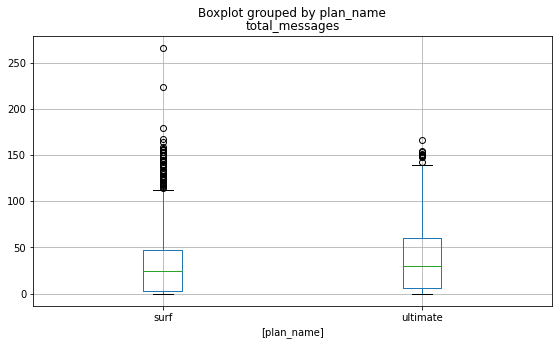

In [ ]:
#data_mess1 = data.pivot_table(index=['plan_name', 'month'], values = ['total_messages'], aggfunc='mean')
#data_mess1 = data_mess1.rename(columns={'total_messages': 'mean_messages'})
data_mess1.boxplot(by='plan_name', figsize=(9,5))
plt.show()

El diagrama de cajas nos muestra el comportamiento de los clientes en el consumo de mensajes, indicandonos que en el plan ultimate se ocuparon mas mensajes, por ende la media y los cuartiles son superiores a los del plan surf y con una mayor cantidad de valores atípicos en el plan Surf.

### Internet

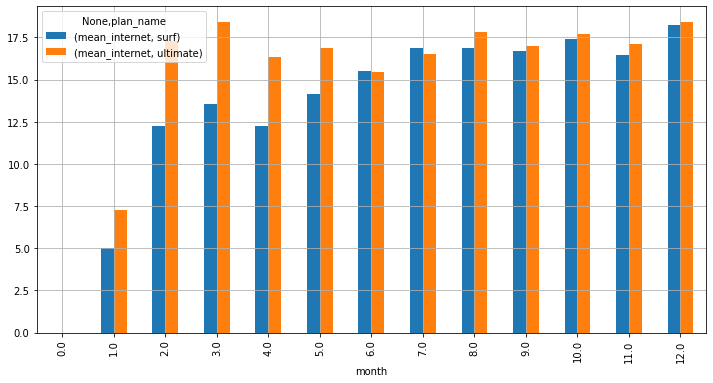

In [ ]:
# Compara la cantidad de tráfico de internet consumido por usuarios por plan
data_int = data.pivot_table(index=['month'], columns='plan_name', values = ['total_internet'], aggfunc='mean')
data_int = data_int.rename(columns={'total_internet': 'mean_internet'})
data_int.plot(kind='bar', figsize=(12,6), grid = True)
plt.show()

El consumo de internet durante los primeros meses lo lidera ampliamente el plan ultimate y a medida que pasa el tiempo, se va casi igualando al de surf.

In [ ]:
int_group = data.groupby(['plan_name', 'month'])['total_internet'].agg(['mean', 'var', 'std'])
int_group

mean         var        std
plan_name month                                  
surf      0.0     0.000000    0.000000   0.000000
          1.0     5.000000   18.000000   4.242641
          2.0    12.222222   41.444444   6.437736
          3.0    13.565217   63.984190   7.999012
          4.0    12.220000   56.215918   7.497728
          5.0    14.116883   58.183527   7.627813
          6.0    15.484536   47.752363   6.910308
          7.0    16.876033   61.476171   7.840674
          8.0    16.882716   71.420942   8.451091
          9.0    16.690722   49.240639   7.017167
          10.0   17.409283   60.725846   7.792679
          11.0   16.431095   54.607824   7.389711
          12.0   18.238994   69.210841   8.319305
ultimate  0.0     0.000000    0.000000   0.000000
          1.0     7.250000   14.916667   3.862210
          2.0    17.285714   37.904762   6.156684
          3.0    18.416667  138.628788  11.774073
          4.0    16.333333   85.833333   9.264628
          5.0    16.862069   54.194581   7.361697
          6.0    15.425532   68.858464   8.298100
          7.0    16.491525   64.254237   8.015874
          8.0    17.845070   58.047082   7.618864
          9.0    17.011628   47.258687   6.874495
          10.0   17.716981   54.604852   7.389510
          11.0   17.118110   54.390701   7.375005
          12.0   18.397351   58.841060   7.670793

Los valores de la tabla anterior aumentan progresivamente a medida que avanzan los meses. Se tiene una varianza bastante alta en comparación al consumo de mensajes y llamadas.

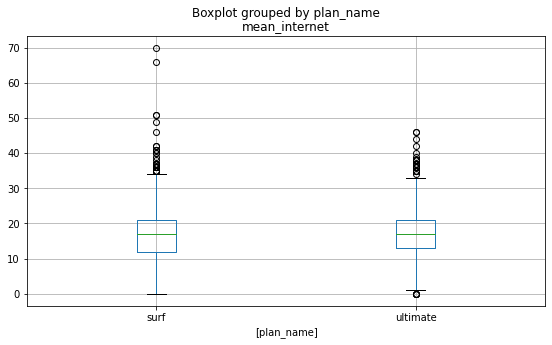

In [ ]:
data_int1 = data.pivot_table(index=['plan_name', 'month', 'user_id'], values = ['total_internet'], aggfunc='mean')
data_int1 = data_int1.rename(columns={'total_internet': 'mean_internet'})
data_int1.boxplot(by='plan_name', figsize=(9,5))
plt.show()

El consumo de internet para el plan surf ha ido en aumento a lo largo de los meses, mientras que en ultimate ha tenido pocos valores atípicos en los primeros meses y el resto de meses ha ido en aumento concentrando sus valores en una media de 17500mb usadas.

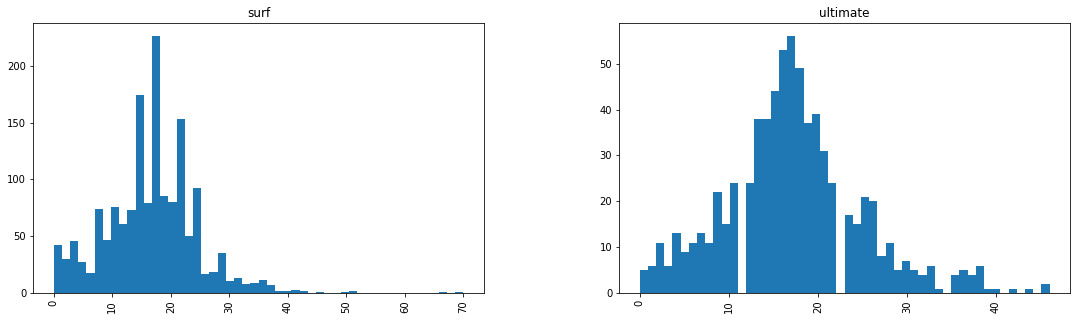

In [ ]:
data_int1.hist(by='plan_name',bins=50, figsize=(18,5))
plt.show()

El gráfico del histograma del internet muestras los usuarios que han consumido el internet, viéndose un distribucion binomial en ambos, pero en el plan Ultimate se encuentra mejor distribuido, y donde hay un consumo mayormente concentrado dentro de lo límites de su plan. Mientras que Surf tiene algunos usuarios quiénes exceden su plan, y se alejan de la media.

## Ingreso

          total_incoming           
plan_name           surf   ultimate
month                              
0.0            20.000000  70.000000
1.0            20.000000  70.000000
2.0            34.396667  70.000000
3.0            45.941304  74.666667
4.0            40.710600  73.000000
5.0            47.628182  70.724138
6.0            49.276289  71.638298
7.0            62.674050  71.898305
8.0            63.931173  72.859155
9.0            58.271495  72.034884
10.0           65.421224  72.311321
11.0           58.004276  71.708661
12.0           70.557044  73.291391


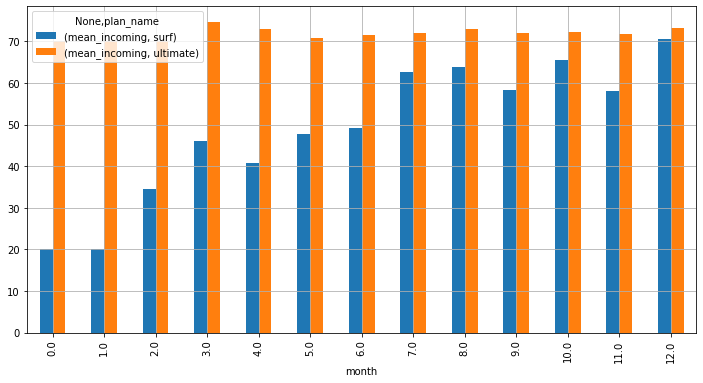

In [ ]:
data_income = data.pivot_table(index=['month'], columns='plan_name', values = ['total_incoming'], aggfunc='mean')
print(data_income)
data_income = data_income.rename(columns={'total_incoming': 'mean_incoming'})
data_income.plot(kind='bar', figsize=(12,6), grid = True)
plt.show()

El ingreso por parte del plan ultimate se ha mantenido constante en el valor de $70, el cual es el valor del plan. Mientras que el plan surf ha ido aumentando progresivamente a lo largo de los meses.

In [ ]:
income_group = data.groupby(['plan_name', 'month'])['total_incoming'].agg(['mean', 'var', 'std'])
income_group

mean          var        std
plan_name month                                   
surf      0.0    20.000000     0.000000   0.000000
          1.0    20.000000     0.000000   0.000000
          2.0    34.396667   428.276100  20.694833
          3.0    45.941304  1512.023512  38.884747
          4.0    40.710600  1198.958402  34.625979
          5.0    47.628182  1967.540055  44.356962
          6.0    49.276289  1988.914046  44.597243
          7.0    62.674050  2943.388409  54.253004
          8.0    63.931173  3587.494901  59.895700
          9.0    58.271495  2260.644980  47.546240
          10.0   65.421224  3198.242612  56.553007
          11.0   58.004276  2494.182230  49.941788
          12.0   70.557044  4604.410868  67.855809
ultimate  0.0    70.000000     0.000000   0.000000
          1.0    70.000000     0.000000   0.000000
          2.0    70.000000     0.000000   0.000000
          3.0    74.666667   145.515152  12.062966
          4.0    73.000000   120.400000  10.972693
          5.0    70.724138    15.206897   3.899602
          6.0    71.638298    75.018501   8.661322
          7.0    71.898305   104.472238  10.221166
          8.0    72.859155   154.808451  12.442204
          9.0    72.034884    75.939945   8.714353
          10.0   72.311321   169.606918  13.023322
          11.0   71.708661    94.668416   9.729770
          12.0   73.291391   212.861192  14.589763

Los valores de la media y varianza para el plan surf tienen una alta varianza por tal motivo son valores altos, a diferencia del plan ultimate, el cual todos sus valores se encuentran cerca a la media de 70, por tal motivo la varianza y desviación estándar son valores pequeños.

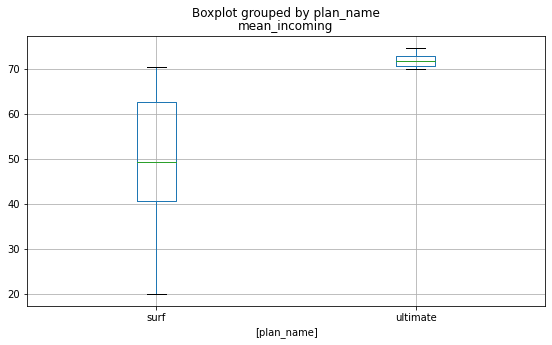

In [ ]:
data_income1 = data.pivot_table(index=['plan_name', 'month'], values = ['total_incoming'], aggfunc='mean')
data_income1 = data_income1.rename(columns={'total_incoming': 'mean_incoming'})
data_income1.boxplot(by='plan_name', figsize=(9,5))
plt.show()

Como se observa en el gráfico, la mayor cantidad de ingresos viene por parte de ultimate, en donde se concentran los datos alrededor de 70, el cual es el valor del plan. Mientras que en el plan surf, hay una amplio rango de valoresque van desde 40 hasta los 65 aproximadamente.

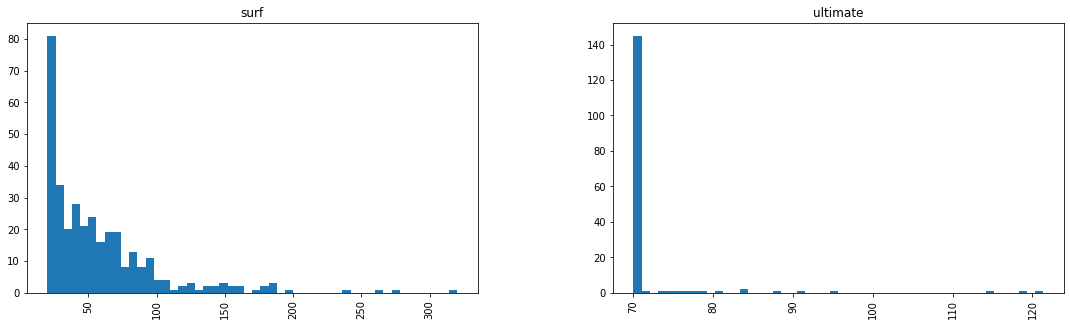

In [ ]:
data_income2 = data.pivot_table(index=['plan_name', 'user_id'], values = ['total_incoming'], aggfunc='mean')
data_income2.hist(by='plan_name',bins=50, figsize=(18,5))
plt.show()

el histograma de Ingresos por parte de los usurios del plan Ultimate se mantienen en el valor de 70, el cual es el valor de su plan, mientras que en el plan Surf tiene varios usuarios que cumplen con su plan de 20, pero también hay mas usuarios que tienen valores adicionales como el internet, por tal razón pagan un valor mas alto, por esos cargos extra.

Gracias Carlos por el comentario, ya se realizaron los gráficos.

## Probar las hipótesis estadísticas.

In [ ]:
# Prueba las hipótesis
h_surf = data_income.iloc[:, 0]
h_ulti = data_income.iloc[:, 1]

In [ ]:
# hipótesis nula = las personas del plan surf solo consumen los $20 de su plan.
# hipótesis alternativa = Las personas del plan surf consumen mas de $20.
optimal_value = 20

alpha =0.05
results = st.ttest_1samp(h_surf, optimal_value)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No rechazamos la hipótesis nula")

p-value:  3.860561408774266e-05
Rechazamos la hipótesis nula


Se rechaza la hipótesis nula que dice que los clientes del plan surf solo consumen los 20 de su plan, no necesitan mas. Por ende se acepta la hipótesis alternativa en el que los clientes del plan surf consumen mas de $20 porque llegan a necesitar mas mb.
Se escogió el alpha 0.05 porque es el valor mas usado y además se escogió este tipo de prueba estadistica porque estamos trabajando con una muestra y comparándola con un valor dado.

In [ ]:
# Prueba las hipótesis
# Se va a probar la hipótesis de que los usuarios del plan Surf tienen un ingreso igual al de los usuarios del plan Ultimate.

alpha = 0.05

results = st.ttest_ind(h_surf, h_ulti, equal_var = False )
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.00031427171298590466
Rechazamos la hipótesis nula


Según el análisis de la prueba de hipótesis se llega a concluir que los usuarios del plan surf no tienen ingresos parecidos a  los usuarios del plan ultimate, a pesar de que los usuarios del plan surf aumentan su gasto al pasar los meses, los usuarios del plan Ultimate se mantienen en el mismo valor.

Se uso este tipo de prueba de hipótesis porque se necesitó comparar las medias de dos poblaciones estadísticas diferentes.

Gracias Carlos, ya se realizó la prueba de hipótesis.

users_income_ny es la media de ingresos para cada usuario del área NY-NJ

In [ ]:
users_income_ny = data[data['city'] == "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_income_ny = users_income_ny.groupby('user_id')['total_incoming'].mean()
users_income_ny

user_id
1014     29.420000
1022     56.125000
1024     21.920000
1027     33.333333
1031     70.000000
           ...    
1469    100.000000
1482     70.000000
1494     30.625000
1495    118.325000
1498     77.272727
Name: total_incoming, Length: 80, dtype: float64

users_nony es la variable que nos indica a los usuarios que se encuentran fuera del área de NY-NJ

In [ ]:
users_income_nony = data[data['city'] != "New York-Newark-Jersey City, NY-NJ-PA MSA"]
users_income_nony = users_income_nony.groupby('user_id')['total_incoming'].mean()
users_income_nony

user_id
1000     70.000000
1001     50.018000
1002     33.333333
1003    158.120000
1004     76.250000
           ...    
1492     25.000000
1493     70.000000
1496     28.000000
1497     70.000000
1499     55.000000
Name: total_incoming, Length: 420, dtype: float64

Gracias Carlos, ya realicé los cambios.

In [ ]:
# Prueba las hipótesis
# Se va a probar la hipótesis de que los usuarios del área de NY-NJ tienen un ingreso por parte de los planes
#igual al de los usuarios que no se encuentran en esta área.

alpha = 0.05

results = st.ttest_ind(users_income_ny, users_income_nony, equal_var = False )
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.5414712093744904
No rechazamos la hipótesis nula


Según el análisis de la prueba de hipótesis se llega a concluir que los usuarios del área de NY-NJ tienen un comportamiendo parecido con las otras áreas del país y por ende los ingresos promedios no son diferentes entre ambas áreas.

Se uso este tipo de prueba de hipótesis porque se necesitó comparar las medias de dos poblaciones estadísticas diferentes.

## Conclusión general

Se realizaron los procesos de carga de datos, de los diferentes datasets que se tenia. Se cambiaron algunos tipos de datos para poder manejar los datos de cada columna. Se trabajó con los datos redondeando sus valores para acoplarlos a como se hacia el cálculo para cada plan. Las tablas se fueron uniendo y acomodando para que se vean de mejor manera y se puedan trabajar los datos fácilmente.

Analizando todos los datos que se encontraron en el proyecto se llegó a la conclusión de que las personas a medida que pasan los meses aumentan su consumo en llamadas, mensajes e internet. Los usuarios que cuentan con el plan ultimate, a pesar del aumento en el consumo de su plan, no se vio afectado su bolsillo, porque a la final llegaron a pagar en promedio los 70 que costó su plan. Mientras que los usuarios con el plan Surf aumentaron sus ingresos mensuales debido a que ocuparon mas mensajes, llamadas, internet del que les incluia en su plan. Pero a pesar de eso, el impactó no fue tan alto como para tener la necesidad de pagar por el plan de 70, ya que los valores promedio para cada mes no llegaron a $70, salvo el mes de Diciembre, en el que los ingresos promedios si fueron en promedio 70. Entonces, el plan que le genera mas ingresos a la empresa es el plan "Surf" porque hay una mayor cantidad de usuarios que contrató este plan, por ende se tienen que dedicar los esfuerzos de la campaña de marketing hacia este plan.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Hola, Bryan. Tenemos un problema con la construcción de la tabla de consumo que debemos solucionar. Una vez se corrijan los problemas apropiadamente continuaremos con la revisión. Recuerda actualizar las conclusiones de ser necesario después de la corrección.
</div>

<div class="alert alert-block alert-danger">
    
# Comentarios generales
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo, Bryan. Has corregido la construcción de la tabla. Nos quedan unos comentarios pendientes por solucionar en las secciones siguientes y podremos aprobar el proyecto.
</div>

<div class="alert alert-block alert-success">
    
# Comentarios generales
    
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Gran trabajo, Bryan. Has corregido todo lo sugerido y has aprobado un nuevo proyecto.
    
¡Felicitaciones!
</div>